
## Speech recognition 2
### Experiment with longer “feature vector”, MFCC-s. Try two numbers between 11 and 32. Report on thefindings.
### On second part: Generating spectrograms for two of words used in program 1.

### Preparing the data and importing functions from preproces.py

In [1]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 32

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 5

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

C:\Users\Victor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Saving vectors of label - 'yes': 100%|████| 2377/2377 [00:17<00:00, 134.70it/s]


In [2]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

# Building The Model Then Training it

In [3]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 5586 samples, validate on 3725 samples
Epoch 1/50
5586/5586 [==============================] - ETA: 1:15 - loss: 2.9265 - acc: 0.240 - ETA: 57s - loss: 3.6285 - acc: 0.225 - ETA: 49s - loss: 4.1778 - acc: 0.23 - ETA: 46s - loss: 3.8369 - acc: 0.23 - ETA: 42s - loss: 3.4683 - acc: 0.22 - ETA: 41s - loss: 3.1901 - acc: 0.24 - ETA: 40s - loss: 2.9992 - acc: 0.23 - ETA: 39s - loss: 2.8497 - acc: 0.23 - ETA: 38s - loss: 2.7046 - acc: 0.24 - ETA: 37s - loss: 2.5937 - acc: 0.24 - ETA: 35s - loss: 2.5092 - acc: 0.24 - ETA: 34s - loss: 2.4309 - acc: 0.25 - ETA: 33s - loss: 2.3637 - acc: 0.25 - ETA: 32s - loss: 2.3045 - acc: 0.26 - ETA: 31s - loss: 2.2618 - acc: 0.26 - ETA: 30s - loss: 2.2206 - acc: 0.26 - ETA: 29s - loss: 2.1800 - acc: 0.27 - ETA: 28s - loss: 2.1421 - acc: 0.27 - ETA: 27s - loss: 2.1042 - acc: 0.28 - ETA: 26s - loss: 2.0743 - acc: 0.29 - ETA: 25s - loss: 2.0483 - acc: 0.29 - ETA: 25s - loss: 2.0232 - acc: 0.29 - ETA: 24s - loss: 1.9980 - acc: 0.29 - ETA: 23s - loss: 1.

## Prediction: trying with the word "dog"

In [4]:
print(predict('/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/dog/0b09edd3_nohash_1.wav', model=model))

dog


## Trying with the word "yes"

In [6]:
print(predict('/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/yes/01bb6a2a_nohash_2.wav', model=model))


yes


## Checking with the word "down" not included in the training set:

In [9]:
print(predict('/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/down/98447c43_nohash_0.wav', model=model))

dog


We can see that the network identified the word as "dog". 

## Checking with the word "house" not included in the training set:

In [10]:
print(predict('/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/house/0d393936_nohash_0.wav', model=model))

down


We can see that the network identified the word as "down".

### Generating spectrograms for word "dog" used in problem 1.

### Importing libraries:

In [16]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

### Selecting a file of the word "dog"

In [13]:
#train_audio_path = 'train/audio/'
filename = '/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/dog/0b09edd3_nohash_1.wav'
sample_rate, samples = wavfile.read(filename)

### Define a function that calculates the spectrogram.

In [14]:
#def log_specgram(audio, sample_rate, window_size=20,
#                 step_size=10, eps=1e-10):
def log_specgram(audio, sample_rate=16000, window_size=20,
                 step_size=10, eps=1e-10):
    if audio.ndim > 1 : #ignore channels  2+
        audio = audio[:,0]
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3)) 
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Creating a spectrogram for the word "dog"

Text(0.5,0,'Seconds')

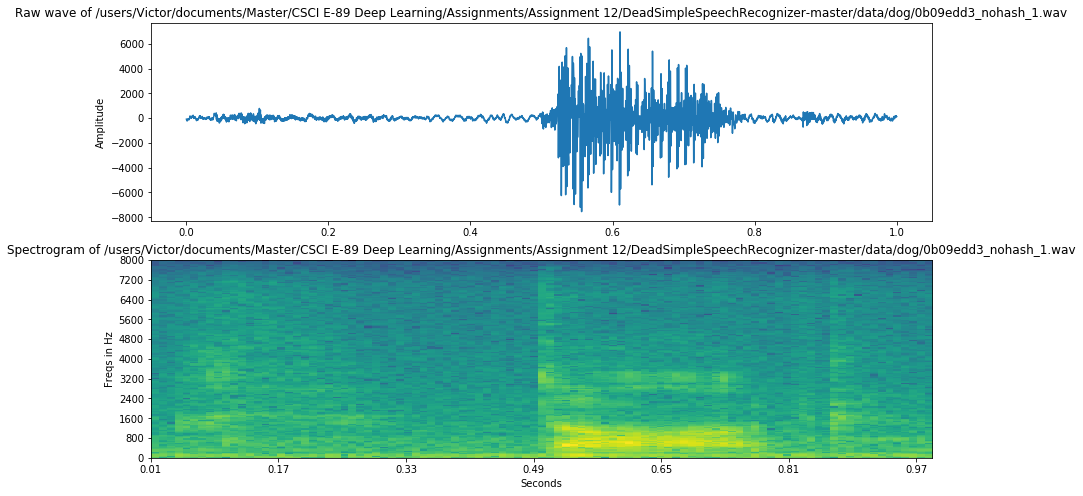

In [15]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Selecting a file of the word "yes"

In [18]:
#train_audio_path = 'train/audio/'
filename = '/users/Victor/documents/Master/CSCI E-89 Deep Learning/Assignments/Assignment 12/DeadSimpleSpeechRecognizer-master/data/yes/01bb6a2a_nohash_2.wav'
sample_rate, samples = wavfile.read(filename)

### Define a function that calculates the spectrogram.

In [20]:
#def log_specgram(audio, sample_rate, window_size=20,
#                 step_size=10, eps=1e-10):
def log_specgram(audio, sample_rate=16000, window_size=20,
                 step_size=10, eps=1e-10):
    if audio.ndim > 1 : #ignore channels  2+
        audio = audio[:,0]
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3)) 
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Creating a spectrogram for the word "yes"

Text(0.5,0,'Seconds')

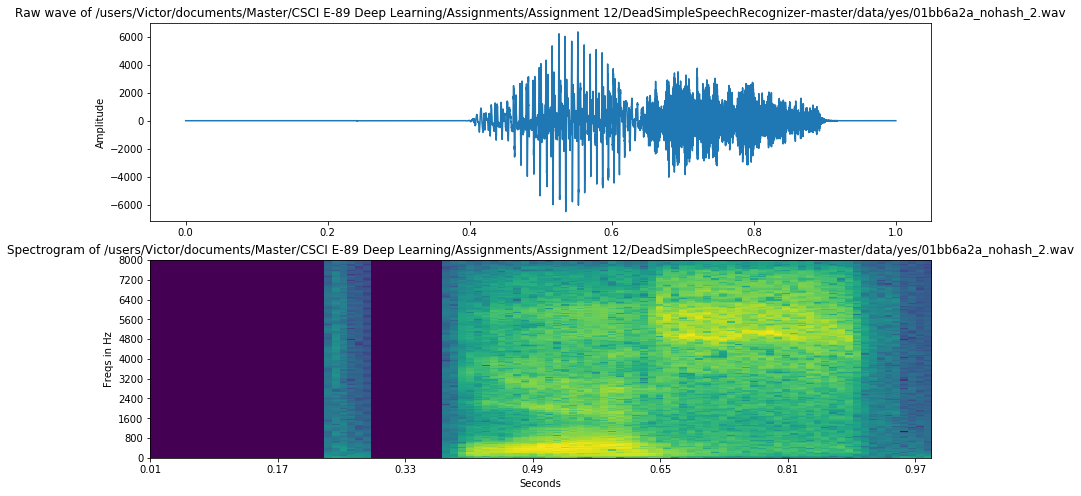

In [21]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')